In [1]:
 import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
auth_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-gataulin-20/shared/problem1-auth_data.csv', sep=';')

In [3]:
reg_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-gataulin-20/shared/problem1-reg_data.csv', sep=';')

In [4]:
#Приводим дату к нужному нам формату и мерджим в один датафрейм
auth_data.auth_ts = pd.to_datetime(auth_data.auth_ts, unit='s')
reg_data.reg_ts = pd.to_datetime(reg_data.reg_ts, unit='s')
df = auth_data.merge(reg_data, how='left', on='uid')

In [5]:
#Приводим дату к формату год-месяц-день. считаем разниу между регистрацией и действием
df['auth_ts'] = pd.to_datetime(df['auth_ts'], format='%Y-%m-%dT').dt.normalize()
df['reg_ts'] = pd.to_datetime(df['reg_ts'], format='%Y-%m-%dT').dt.normalize()
def diff(x, y):
    end = x.dt.to_period('D').view(dtype='int64')
    start = y.dt.to_period('D').view(dtype='int64')
    return end-start
df['delta'] = diff(df.auth_ts, df.reg_ts)

In [6]:
df2 = df.groupby(['reg_ts', 'auth_ts'], as_index=False) \
    .agg({'uid':'nunique'}) \
    .rename(columns=({'uid':'numbers_players'}))

In [7]:
df2['delta'] = diff(df2.auth_ts, df2.reg_ts)

In [8]:
df2 = df2.query('reg_ts >= "2018-06-01" and reg_ts <= "2018-06-15"')
#Получаем датафрейм с количеством игроков по дням активности и разницей между reg и auth. 
#Для наглядности выберем временной промежуток с 1 июня 2018 - 15 июня 2018

In [9]:
df2 = df2.pivot(index='reg_ts', columns = 'delta', values = 'numbers_players')

In [10]:
first_month = df2.iloc[:, 0]

In [11]:
df2 = df2.divide(first_month, axis=0)

In [22]:
df2

delta,0,1,2,3,4,5,6,7,8,9,...,836,837,838,839,840,841,842,843,844,845
reg_ts,,,,,,,,,,,,,,,,,,,,,
2018-06-01,1.0,0.024390,0.036585,0.029268,0.051220,0.078049,0.053659,0.034146,0.041463,0.056098,...,0.014634,0.017073,0.017073,0.014634,0.007317,0.019512,0.017073,0.012195,0.017073,0.004878
2018-06-02,1.0,0.021951,0.036585,0.039024,0.048780,0.080488,0.078049,0.065854,0.034146,0.063415,...,0.007317,0.012195,0.004878,0.007317,0.012195,0.009756,0.014634,0.004878,0.002439,NaN
2018-06-03,1.0,0.017032,0.053528,0.072993,0.058394,0.063260,0.092457,0.063260,0.070560,0.058394,...,0.014599,0.014599,0.012165,0.019465,0.009732,0.009732,0.007299,0.004866,NaN,NaN
2018-06-04,1.0,0.024272,0.041262,0.033981,0.048544,0.055825,0.046117,0.075243,0.046117,0.058252,...,0.012136,0.009709,0.016990,0.007282,0.014563,0.024272,0.004854,NaN,NaN,NaN
2018-06-05,1.0,0.021845,0.041262,0.031553,0.038835,0.070388,0.092233,0.050971,0.060680,0.043689,...,0.007282,0.009709,0.014563,0.019417,0.004854,0.007282,NaN,NaN,NaN,NaN
2018-06-06,1.0,0.019370,0.033898,0.072639,0.033898,0.070218,0.067797,0.070218,0.036320,0.082324,...,0.016949,0.021792,0.016949,0.014528,0.004843,NaN,NaN,NaN,NaN,NaN
2018-06-07,1.0,0.028986,0.028986,0.053140,0.041063,0.041063,0.072464,0.053140,0.053140,0.036232,...,0.009662,0.021739,0.012077,0.012077,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-08,1.0,0.026570,0.033816,0.028986,0.045894,0.062802,0.053140,0.055556,0.026570,0.041063,...,NaN,0.009662,0.002415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-09,1.0,0.019277,0.062651,0.048193,0.069880,0.050602,0.074699,0.065060,0.057831,0.053012,...,0.007229,0.009639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df2_final = (df2.style.format("{:.2%}"))

In [25]:
df2_final

Таким образом, мы получили результаты когортного нализа за выбранный нами промежуток времени.

Задание 2

In [30]:
ex_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-gataulin-20/Проект_1_Задание_2 (1).csv', sep=';')

In [31]:
ex_2

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


In [33]:
ab_ga = ex_2.query('testgroup == "a"')
ab_gb = ex_2.query('testgroup == "b"')

In [86]:
Boots_ARPU_mean['p_value']

0.5182349219792022

In [46]:
# ARPU - средний доход с каждого пользователя
ARPU_df = ex_2.groupby('testgroup', as_index=False).agg({'revenue': 'mean'})
ARPU_df

,testgroup,revenue
0,a,25.413720
1,b,26.751287


In [49]:
(ARPU_df.revenue[1]/ARPU_df.revenue[0]) * 100 - 100

5.263168360069898

ARPU тестовой группы больше 5.3%

In [51]:
ARPPU_df = ex_2.query('revenue > 0').groupby('testgroup', as_index=False).agg({'revenue': 'mean'})
ARPPU_df

,testgroup,revenue
0,a,2663.998444
1,b,3003.658172


In [52]:
(ARPPU_df.revenue[1]/ARPPU_df.revenue[0]) * 100 - 100

12.749997227996346

ARPPU в тестовой группы больше на 12.8%

In [53]:
revenue_df = ex_2.groupby('testgroup', as_index=False).agg({'revenue': 'sum'})
revenue_df

,testgroup,revenue
0,a,5136189
1,b,5421603


In [54]:
(revenue_df.revenue[1]/revenue_df.revenue[0]) * 100 - 100

5.556921678699894

Доход тестовой гурппы больше на 5.6%

In [66]:
pu_1 = ex_2.query('revenue > 0') \
    .groupby('testgroup', as_index = False) \
    .agg({'user_id' : 'nunique'})

In [68]:
pu_2 = ex_2.groupby('testgroup', as_index = False) \
    .agg({'user_id' : 'nunique'})

In [72]:
pu_total = pu_1.merge(pu_2, on='testgroup')

In [79]:
pu_total['paying_percent'] = (pu_total['user_id_x'] / pu_total['user_id_y'])

In [82]:
pu_total

,testgroup,user_id_x,user_id_y,paying_percent
0,a,1928,202103,0.009540
1,b,1805,202667,0.008906


Доля платящих клиентов в тестовой группе уменьшилась на 7%

In [84]:
def bootstrap(
    column_1,
    column_2,
    boot_it = 1000,
    statistic = np.mean,
    bootstrap_conf_level = 0.95
):
    boot_len = max([len(column_1), len(column_2)])
    boot_data = []
    for i in range(boot_it):
        samples_1 = column_1.sample(
            boot_len, 
            replace = True
        ).values
        
        samples_2 = column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

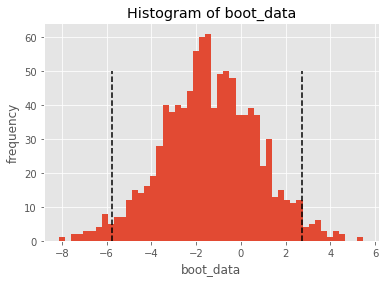

In [85]:
Boots_ARPU_mean = bootstrap(ab_ga['revenue'], ab_gb['revenue'])

 / ARPU у тестовой группы незначительно выше чем у контрольной - 5.3%
 / ARPPU у тестовой группы значительно выше чем у контрольной - 12.8%
 / Согласно bootstrap статистического значимого различия в группах нет 
 / Таким образом, можем сделать вывод, что набор акционных предложений для тестовой группы более успешен.
 

Задание 3

Чтобы определить успешность привлечения игроков, важнейшей метрикой является Sticky Factor (показатель, который позволяет оценить регулярность посещений и стабильность пользовательской базы.)

 / ARPU и ARPPU.

 / MAU, WAU, DAU.

 / Средняя продолжительность сессии

" Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как? "

 / Все предыдущие метрики

/ churn rate

 / Этап, после которого игроки "отваливаются".